# Assignment 1

Name: Deepa Mandal
Roll No. CRS2004

### Generate 20 points dataset from the two sides of the Hyperplane x + y + z = 1 in the Euclidean Space. Design Logistic Regression Classifiers and draw a plane (may be different from this plane) to simulate data in 3D space.

In [12]:
import numpy as np
import pandas as pd
import  random
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
# Generate 20 points from both sides of the Hyper plane x+y+z=1

num_points = 20

x= np.random.normal(0, 1, 100)
y= np.random.normal(0, 1, 100)
z= np.random.normal(0, 1, 100)

set1= []
set2= []

for i in range(100):
    if x[i]+y[i]+z[i]-1>0 and len(set1)< 10:
        set1.append((x[i], y[i], z[i], 1))
    if x[i]+y[i]+z[i]-1<=0 and len(set2)< 10:
        set2.append((x[i], y[i], z[i], 0))

sum= set1+set2
df= pd.DataFrame(sum)
        
df_set1= pd.DataFrame(set1)
df_set2= pd.DataFrame(set2)
        

In [14]:
df_set1

,0,1,2,3
0,-0.111865,1.244666,1.735304,1
1,1.514353,1.632039,-1.508611,1
2,0.294865,0.563707,0.590353,1
3,1.499331,2.133254,0.271921,1
4,2.068334,1.080247,1.400738,1
5,0.402623,0.645129,0.485706,1
6,-0.016946,2.774059,1.812020,1
7,1.913920,-0.364710,0.784609,1
8,-0.221463,0.126856,1.509417,1
9,0.588988,0.065164,1.063524,1


In [15]:
df_set2

,0,1,2,3
0,0.538586,-0.195282,-0.281139,0
1,-0.726602,0.303485,-0.290050,0
2,0.811062,-0.560093,0.210941,0
3,-1.672963,-0.419112,-0.499801,0
4,-0.963734,-1.675463,0.672094,0
5,0.063068,-1.421636,-0.886906,0
6,-1.675038,-0.521230,0.853356,0
7,-0.112057,-1.993764,0.535258,0
8,-1.121650,-0.658142,-1.491455,0
9,0.726676,-1.545695,-2.283287,0


In [16]:
np.shape(df)
df

,0,1,2,3
0,-0.111865,1.244666,1.735304,1
1,1.514353,1.632039,-1.508611,1
2,0.294865,0.563707,0.590353,1
3,1.499331,2.133254,0.271921,1
4,2.068334,1.080247,1.400738,1
5,0.402623,0.645129,0.485706,1
6,-0.016946,2.774059,1.812020,1
7,1.913920,-0.364710,0.784609,1
8,-0.221463,0.126856,1.509417,1
9,0.588988,0.065164,1.063524,1


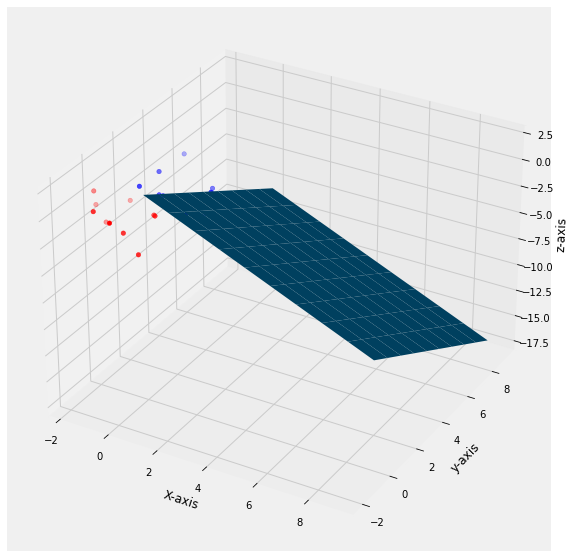

In [17]:
# create the figure
fig = plt.figure(figsize=(10, 10))

# add axes
ax = fig.add_subplot(111,projection='3d')

x1= df_set1.loc[:, 0]
x2= df_set2.loc[:, 0]
y1= df_set1.loc[:, 1]
y2= df_set2.loc[:, 1]
z1= df_set1.loc[:, 2]
z2= df_set2.loc[:, 2]

xx, yy = np.meshgrid(range(10), range(10))

# Calculate corresponding z
z= (1- xx- yy)

# plot the plane
plane= ax.plot_surface(xx, yy, z)


# plot the point 
ax.scatter(x1, y1, z1,  color='blue')
ax.scatter(x2, y2, z2,  color='red')

ax.set_xlabel('X-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')


plt.show()


In [18]:
X= df.loc[:, 0:2]
Y= df.loc[:, 3]

In [19]:

X["D"]= np.ones(shape=(20))


## Design Logistic Regression

### Loss Function:
The loss function of Logistic Regression is defined as
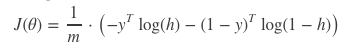

In [20]:
#import sklearn.linear_model import LogisticRegression

# Define Sigmoid Function
def SigmoidFunc(z):
    return 1/(1+ np.exp(-z))

# Define Loss Function
def loss(h, y):
    return (-y.T * np.log(h) - (1 - y).T * np.log(1 - h)).mean()

# Define Gradient
def gradient(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

# Define Logistic Regression
def LogisticRegression(X, y, theta, alpha, iters):
    # add 1 column to allow vectorized calculations
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    # Initial theta values
    theta = np.zeros(X.shape[1])
    cost_array = np.zeros(iters)
    op=[]
    
    for i in range(iters):
        h = SigmoidFunc(np.dot(X, theta))
        cost_num = loss(h, y)
        cost_array[i] = cost_num
        op.append(cost_num)
        gradient_val = gradient(X, h, y)
        
        # Run Gradient Descent to minimize the Loss Function
        theta = theta - (gradient_val * alpha)
        
    return theta, op, cost_array

def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Number of Iterations')
    ax.set_ylabel('Loss Function')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

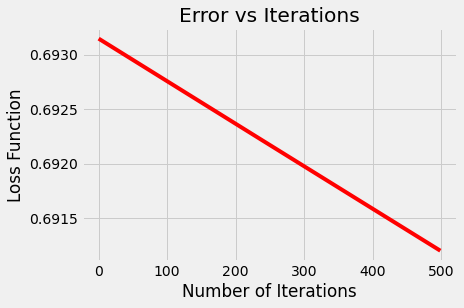

In [23]:
# define hyperparameters
alpha = 0.00001
iterations = 500

# Initial theta values
theta = np.zeros(X.shape[1])

# run logistic regression
w, h, cost_num = LogisticRegression(X, Y, theta, alpha, iterations)


# display cost chart
plotChart(iterations, cost_num)

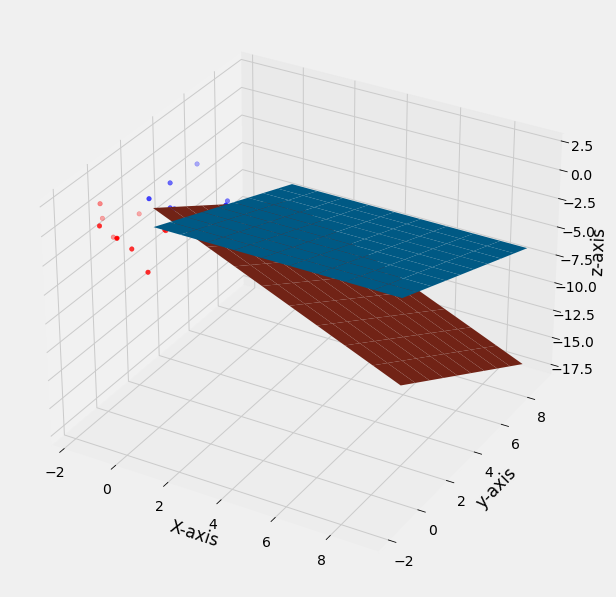

In [24]:
num_points= 20

# create the figure
fig = plt.figure(figsize=(10, 10))

# add axes
ax = fig.add_subplot(111,projection='3d')

x1= df_set1.loc[:, 0]
x2= df_set2.loc[:, 0]
y1= df_set1.loc[:, 1]
y2= df_set2.loc[:, 1]
z1= df_set1.loc[:, 2]
z2= df_set2.loc[:, 2]

xx, yy = np.meshgrid(range(10), range(10))

# Calculate corresponding z
zz= -(w[0]*xx + w[1]*yy + w[3])/w[2]
z=(1-xx-yy)

# plot the plane
plane1= ax.plot_surface(xx, yy, zz)
plane2= ax.plot_surface(xx, yy, z)


# plot the point 
ax.scatter(x1, y1, z1,  color='blue')
ax.scatter(x2, y2, z2,  color='red')

ax.set_xlabel('X-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')


plt.show()
